## Necessary libraries

In [1]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

## Loading data

In [2]:
calm = scipy.io.loadmat('Data/Data/C.mat')['C']
fear = scipy.io.loadmat('Data/Data/F.mat')['F']
happy = scipy.io.loadmat('Data/Data/H.mat')['H']
sad = scipy.io.loadmat('Data/Data/S.mat')['S']

In [ ]:
print("Calm shape",calm.shape) #230 records 138 features
print("fear shape",fear.shape)
print("happy shape",happy.shape)
print("sad shape",sad.shape)

Calm shape (230, 138)
fear shape (230, 138)
happy shape (230, 138)
sad shape (230, 138)


# Create Targets
0. Calm
1. Fear
2. Happy
3. Sad

In [4]:
calm_target = np.zeros(230)
fear_target = np.ones(230)
happy_target = 2*np.ones(230)
sad_target = 3*np.ones(230)

In [5]:
X = np.concatenate([calm,fear,happy,sad])
y = np.concatenate([calm_target,fear_target,happy_target,sad_target])

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Models
1. Random Forest 
2. K Nearest Neighbor

## Random Forest Model

In [7]:
rf = RandomForestClassifier(n_estimators=10,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

### Random Forest's Train & Test Accuarcy

In [8]:
pred = rf.predict(X_test)
print(f"RF Train accuracy: {accuracy_score(y_train,rf.predict(X_train))*100:.2f}%")
print(f"RF Test accuracy: {accuracy_score(y_test,pred)*100:.2f}%")

RF Train accuracy: 99.53%
RF Test accuracy: 80.43%


### Random Forest Confusion Matrix

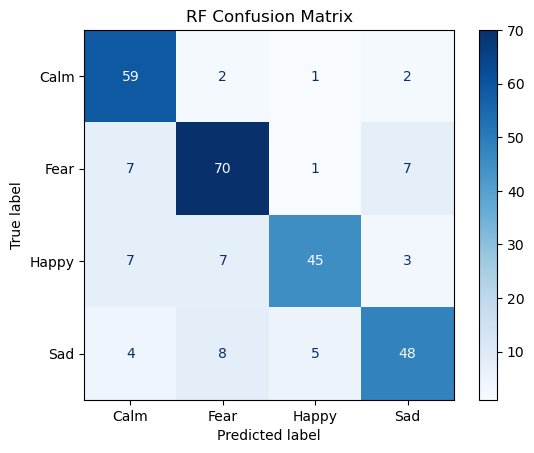

In [9]:
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['Calm','Fear','Happy','Sad'])
disp.plot(cmap=plt.cm.Blues)
plt.title('RF Confusion Matrix')
plt.show()

### Random Forest Classification Report

In [10]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84        64
         1.0       0.80      0.82      0.81        85
         2.0       0.87      0.73      0.79        62
         3.0       0.80      0.74      0.77        65

    accuracy                           0.80       276
   macro avg       0.81      0.80      0.80       276
weighted avg       0.81      0.80      0.80       276



## KNN Classifier

In [11]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
predk = knn.predict(X_test)
print(f"KNN Train accuracy: {accuracy_score(y_train,knn.predict(X_train))*100:.2f}%")
print(f"KNN Test accuracy: {accuracy_score(y_test,predk)*100:.2f}%")

KNN Train accuracy: 99.53%
KNN Test accuracy: 96.01%


### KNN Confusion Matrix

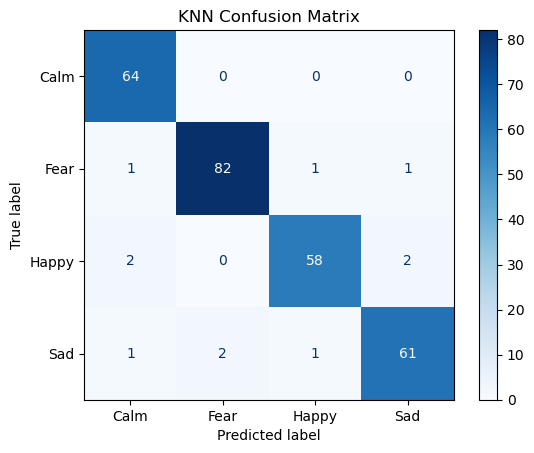

In [13]:
cm = confusion_matrix(y_test,predk)
disp = ConfusionMatrixDisplay(cm,display_labels=['Calm','Fear','Happy','Sad'])
disp.plot(cmap=plt.cm.Blues)  
plt.title('KNN Confusion Matrix')
plt.show()

### KNN Classification Report

In [14]:
print(classification_report(y_test,predk))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        64
         1.0       0.98      0.96      0.97        85
         2.0       0.97      0.94      0.95        62
         3.0       0.95      0.94      0.95        65

    accuracy                           0.96       276
   macro avg       0.96      0.96      0.96       276
weighted avg       0.96      0.96      0.96       276

